In [1]:
import networkx as nx
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
transition_matrix = np.array([[0, 0.99, 0.01], [0.99, 0, 0.01], [0.05, 0.05, 0.9]])
print(transition_matrix)

[[ 0.    0.99  0.01]
 [ 0.99  0.    0.01]
 [ 0.05  0.05  0.9 ]]


In [58]:
filepath = '/media/sf_VBox_Shared/London/accelerometer_5second/merged/models/model_10states_transmatrix'
transition_matrix = np.fromfile(filepath)
N = np.sqrt(len(transition_matrix))
transition_matrix = transition_matrix.reshape(N, N)
transition_matrix.shape

/home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(10, 10)

In [20]:
print(transition_matrix[:4,:4])

[[  9.41445825e-01   7.50421414e-04   4.87410428e-02   3.50927955e-04]
 [  1.37214260e-03   9.37019192e-01   4.75340876e-02   1.10126027e-03]
 [  9.40926309e-03   7.32322554e-03   9.37885956e-01   1.11092521e-02]
 [  2.08024243e-04   5.88638636e-04   3.98424060e-02   9.37785130e-01]]


In [28]:
transition_matrix[transition_matrix<1e-3] = 0

In [59]:
graph = nx.DiGraph(transition_matrix)
#nx.from_numpy_matrix(transition_matrix, nx.DiGraph())

In [43]:
print(nx.adjacency_matrix(graph))

  (0, 1)	0.99
  (0, 2)	0.01
  (1, 0)	0.99
  (1, 2)	0.01
  (2, 0)	0.05
  (2, 1)	0.05
  (2, 2)	0.9


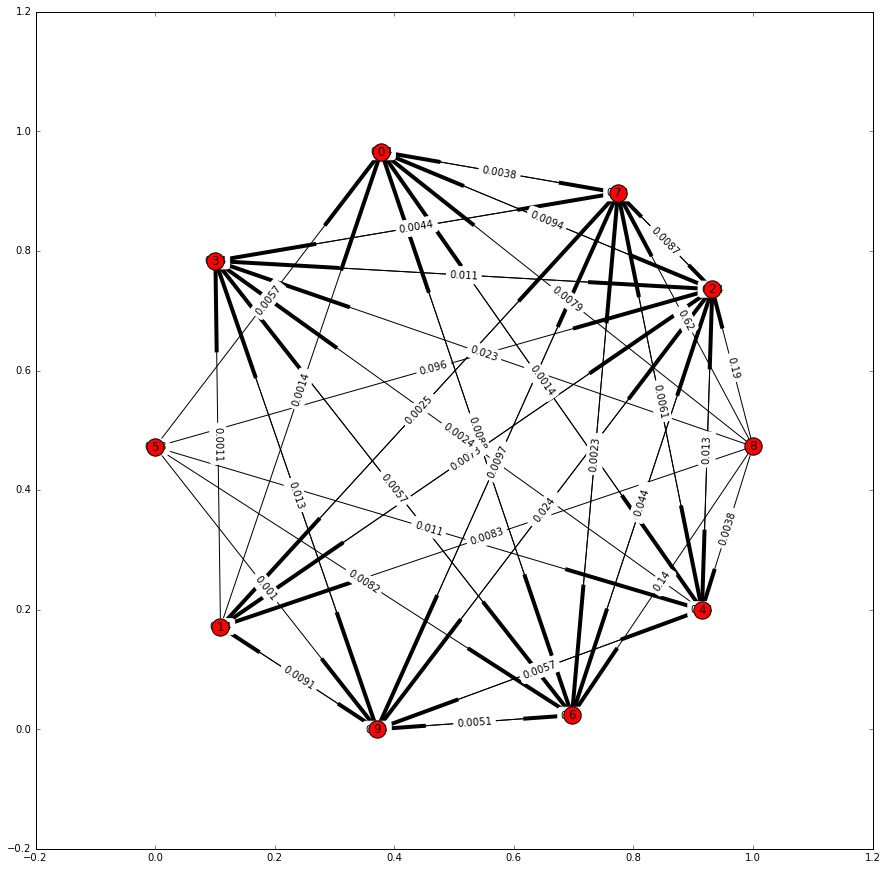

In [30]:
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, pos=pos)
edge_labels=dict([((u,v,),'{:.2}'.format(d['weight']))
             for u,v,d in graph.edges(data=True)])
nx.draw_networkx_edge_labels(graph, pos,edge_labels=edge_labels);

In [48]:
import graphviz

In [62]:
for u,v,d in graph.edges(data=True):
    #d['label'] = '{:.2}'.format(d.get('weight',''))
    d['penwidth'] = min(20*d.get('weight',''), 5)
pgraph = nx.nx_pydot.to_pydot(graph)

In [35]:
pgraph.create_png?

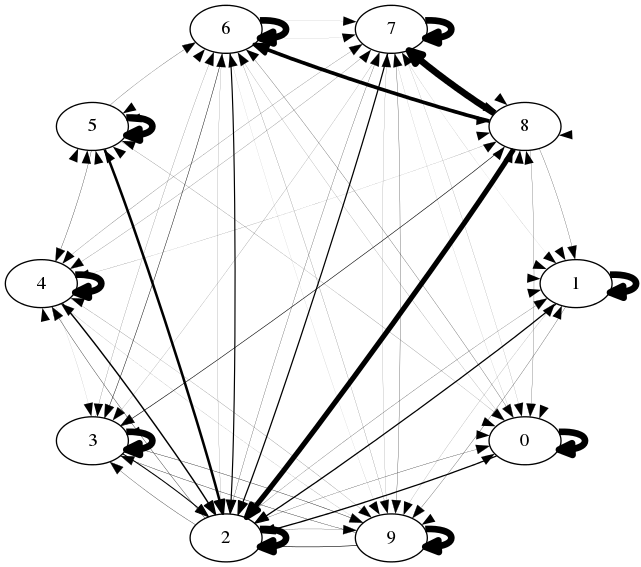

In [63]:
from IPython.display import Image
png_str = pgraph.create_png(prog='circo')
Image(data=png_str, width=700, height=700)

In [68]:
weights = {(u,v): d['weight'] for u,v,d in graph.edges(data=True)}
for k in sorted(weights, key=weights.get, reverse=True):
    print(k, weights[k])

((9, 9), 0.9503492671591869)
((0, 0), 0.9414458248462756)
((2, 2), 0.9378859555765392)
((3, 3), 0.9377851298551046)
((1, 1), 0.9370191922764114)
((4, 4), 0.9284162190010039)
((7, 7), 0.9251419175808866)
((6, 6), 0.9214510308491838)
((5, 5), 0.8778713726981282)
((8, 7), 0.6240098418108947)
((8, 2), 0.1940122818057442)
((8, 6), 0.13847526817833034)
((5, 2), 0.09565267334072104)
((4, 2), 0.05464440156743279)
((0, 2), 0.04874104281448446)
((1, 2), 0.047534087608054665)
((7, 2), 0.047124220919568936)
((6, 2), 0.04429132099037259)
((3, 2), 0.03984240599012506)
((9, 2), 0.023542372206468782)
((8, 3), 0.022509611870712116)
((6, 3), 0.01724552527226805)
((3, 9), 0.013461566666501704)
((2, 4), 0.01250950410256751)
((9, 3), 0.012165992334704043)
((2, 3), 0.011109252134243706)
((5, 4), 0.010748411042153077)
((7, 9), 0.00971838294365108)
((2, 0), 0.009409263086993162)
((1, 9), 0.00906668093954853)
((6, 0), 0.008780822336479813)
((2, 7), 0.008686103133927524)
((2, 9), 0.008300617428889144)
((8, 1), 

In [67]:
sorted?

In [66]:
e = pgraph.get_edges()[0]

In [67]:
e.get_attributes()

{'weight': u'0.7'}